##  Machine Learning, Assignment 1 : Decision Trees

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:
data_diabetes  = pd.read_csv('diabetes.csv')
data_glass = pd.read_csv('glass.csv')

In [4]:
df = pd.DataFrame(data_diabetes)
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
df1 = pd.DataFrame(data_glass)
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [6]:
Y = data_diabetes['class'] 
X = data_diabetes.drop(['class'],axis = 1)

accuracy :  0.7213740458015268


[Text(167.4, 163.07999999999998, 'X[1] <= 143.5\nentropy = 0.928\nsamples = 506\nvalue = [332, 174]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.761\nsamples = 381\nvalue = [297, 84]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.855\nsamples = 125\nvalue = [35, 90]')]

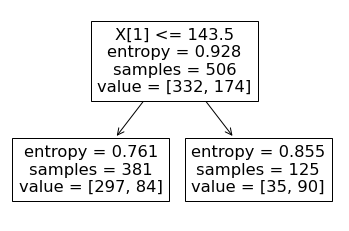

In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.34, random_state = 10)

## one-level decision tree 
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf = clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

##calculate accuracy 
accuracy = accuracy_score(y_pred,y_test)
print('accuracy : ', accuracy)
tree.plot_tree(clf)

0.7251908396946565


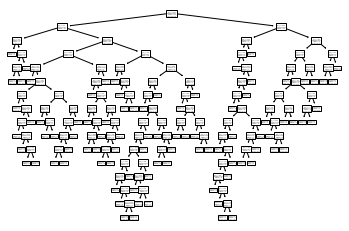

In [8]:
##multi-level decision tree
clfm = DecisionTreeClassifier(criterion = 'entropy' , max_depth = None)
clfm = clfm.fit(x_train,y_train)
y_pred = clfm.predict(x_test)

accuracy = accuracy_score(y_pred,y_test)
tree.plot_tree(clfm)
print(accuracy)

0.7251908396946565


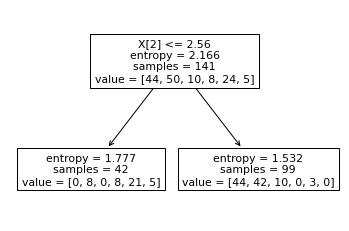

In [9]:
Y_glass = data_glass['class']
X_glass = data_glass.drop(['class'],axis = 1)

## one-level decision tree for glass data
x_tr,x_t,y_tr,y_t = train_test_split(X_glass,Y_glass, test_size = 0.34, random_state = 10)

clfg = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1)
clfg = clfg.fit(x_tr,y_tr)

y_p = clfg.predict(x_t)

accuracy_glass = accuracy_score(y_p,y_t)
tree.plot_tree(clfg)
print(accuracy)

Accuracy 0.6575342465753424


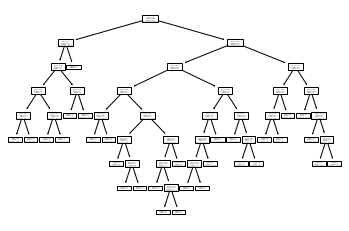

In [10]:
##multi level decision tree for glass data
clfg = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
clfg = clfg.fit(x_tr,y_tr)
y_p = clfg.predict(x_t)

accuracy_glass = accuracy_score(y_p,y_t)
tree.plot_tree(clfg)
print('Accuracy',accuracy_glass)

In [57]:
acc_list = []
acc_l = []

##glass data
for i in range(1,len(X_glass)): 
    clfg = DecisionTreeClassifier(criterion = 'entropy', max_depth = None,min_samples_split = 5, min_samples_leaf = i)
    clfg = clfg.fit(x_tr,y_tr)
    
    y_p = clfg.predict(x_t)
    y_p1 = clfg.predict(x_tr) 
    
    accuracy_glass = accuracy_score(y_p,y_t)
    acc = accuracy_score(y_p1,y_tr)
    acc_list.append(accuracy_glass)
    acc_l.append(acc)
    


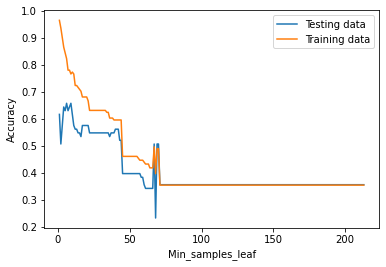

In [60]:
#plot the results
min_s = [i for i in range(1,len(X_glass))]
plt.plot(min_s,acc_list,label = 'Testing data')
plt.plot(min_s,acc_l,label = 'Training data')
plt.xlabel('Min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend();


In [53]:
acc_list =[]
acc_list1 =[]
for i in range(1,len(X)):
        clf = DecisionTreeClassifier(criterion = 'entropy', max_depth= None, min_samples_split = 5, min_samples_leaf = i)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_train)
        y_pred1 = clf.predict(x_test)
        accuracy = accuracy_score(y_pred1,y_test)
        accuracy1 = accuracy_score(y_pred,y_train)
        acc_list.append(accuracy)
        acc_list1.append(accuracy1)


506
262


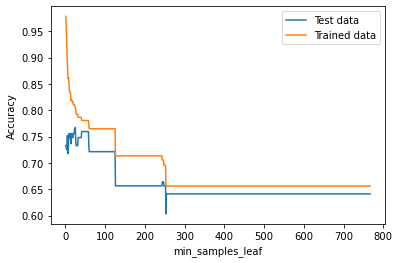

In [55]:
##plot
mins = [i for i in range (1,len(X))]
plt.plot(mins,acc_list,label= 'Test data')
plt.plot(mins,acc_list1, label = 'Trained data')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend();